In [1]:
# Copy this file and then run an experiment
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
import pickle  # Use this to save results so we don't need to rerun experiments
rf = importlib.import_module("random-forests")
misclass_rate = rf.random_forests.misclassification_rate
cmap = {"iris": "blue", "wine": "purple", "heart": "red", "titanic": "green", "breast": "orange"}
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])
def get_mean_sd(results):
    ret = {}
    for k in results.keys():
        ret[k] = np.apply_along_axis(comp_mean_sd, 1, results[k])
    return ret

In [2]:
# Load all datasets to use
mushroom = np.loadtxt("agaricus-lepiota.data", dtype=str, delimiter=",")
wine = np.loadtxt("wine.data", delimiter=",")
iris = np.loadtxt("iris_csv.csv", dtype=str, delimiter=",")
heart = np.loadtxt("processed.cleveland.data", dtype=str, delimiter=",")
titanic = pd.read_csv("titanic.csv").drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).dropna()
breast = np.loadtxt("breast-cancer.data", delimiter=",", dtype=str)

In [3]:
# Clean data
def str_in_arr(arr, str):
    return not np.isin(str, arr)
barr_mushroom = np.apply_along_axis(str_in_arr, 1, mushroom, "?")
mushroom = mushroom[barr_mushroom, :]
barr_breast = np.apply_along_axis(str_in_arr, 1, breast, "?")
breast = breast[barr_breast, :]
barr_heart = np.apply_along_axis(str_in_arr, 1, heart, "?")
heart = heart[barr_heart, :]
heart = heart.astype(float)

In [4]:
# Separate into data and labels
iris_data = iris[1:, :4].astype(float)
iris_labels = iris[1:, 4]
wine_data = wine[:, 1:]
wine_labels = wine[:, 0].astype(int)
heart_data = heart[:, :-1]
heart_labels = heart[:, -1].astype(int)
# Turn heart_labels into array of 0, 1.
# 1 indicates presence of any type of heart disease, 0 indicates no presence
heart_labels_barr = heart_labels >= 1
heart_labels[heart_labels_barr] = 1
mushroom_data = mushroom[:, 1:]
mushroom_labels = mushroom[:, 0]
breast_data = breast[:, 1:]
breast_labels = breast[:, 0]
titanic_data = titanic.loc[:, titanic.columns!="Survived"].to_numpy()  # feature_type: complex
titanic_labels = titanic["Survived"].to_numpy()

In [5]:
# Record the feature types
iris_ftype = "continuous"
heart_ftype = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
wine_ftype = "continuous"
mushroom_ftype = "categorical"
breast_ftype = "categorical"
titanic_ftype = np.array([1, 1, 0, 0, 0, 0, 1])

In [6]:
# Set the seed so test train split it always the same for all tests
np.random.seed(1)
datasets = {"iris": (*train_test_split(iris_data, iris_labels, stratify=iris_labels), "continuous"),
            "wine": (*train_test_split(wine_data, wine_labels, stratify=wine_labels), "continuous"),
            "heart": (*train_test_split(heart_data, heart_labels, stratify=heart_labels), heart_ftype),
            "mushroom": (*train_test_split(mushroom_data, mushroom_labels, stratify=mushroom_labels), "categorical"),
            "titanic": (*train_test_split(titanic_data, titanic_labels, stratify=titanic_labels), titanic_ftype),
            "breast" : (*train_test_split(breast_data, breast_labels, stratify=breast_labels), "categorical")}

In [8]:
po = open("vary_n_trees_breast.pickle", "rb")
results = pickle.load(po)
po.close()

In [10]:
ntrees = np.arange(1, 21)
nexp = 10

In [12]:
dataset = "heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        print(i, j)
        bad_random_forest = rf.BadRandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        bad_random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(bad_random_forest.predict(X_test), y_test)
results[dataset + "_bad"] = result

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9


In [13]:
results["heart_bad"]

array([[0.28      , 0.33333333, 0.30666667, 0.29333333, 0.33333333,
        0.42666667, 0.30666667, 0.33333333, 0.25333333, 0.38666667],
       [0.37333333, 0.26666667, 0.33333333, 0.26666667, 0.34666667,
        0.37333333, 0.33333333, 0.37333333, 0.25333333, 0.28      ],
       [0.28      , 0.26666667, 0.32      , 0.30666667, 0.30666667,
        0.29333333, 0.28      , 0.24      , 0.26666667, 0.33333333],
       [0.24      , 0.28      , 0.26666667, 0.24      , 0.33333333,
        0.28      , 0.28      , 0.30666667, 0.30666667, 0.28      ],
       [0.21333333, 0.29333333, 0.28      , 0.24      , 0.24      ,
        0.25333333, 0.26666667, 0.2       , 0.22666667, 0.2       ],
       [0.28      , 0.2       , 0.22666667, 0.28      , 0.28      ,
        0.26666667, 0.29333333, 0.25333333, 0.26666667, 0.29333333],
       [0.28      , 0.22666667, 0.25333333, 0.26666667, 0.25333333,
        0.25333333, 0.25333333, 0.26666667, 0.28      , 0.28      ],
       [0.26666667, 0.24      , 0.28     

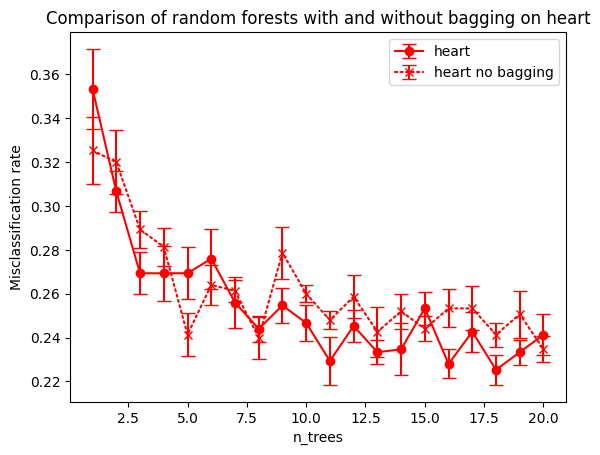

In [22]:
mean_sd = get_mean_sd(results)
m_sd = mean_sd["heart"]
plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label="heart", capsize=5, fmt="o-", c=cmap["heart"])
m_sd = mean_sd["heart_bad"]
# dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
# dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label="heart no bagging", capsize=5, fmt="x:", c=cmap["heart"], dash_capstyle="round")
plt.xlabel("n_trees")
plt.ylabel("Misclassification rate")
plt.title("Comparison of random forests with and without bagging on heart")
plt.legend()

In [18]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    .. versionadded:: 3.7
       Caps and error lines are drawn in polar coordinates on polar plots.
    
    
    Parameters
    ----------
    x, y : float or array-like
        The data positions.
    
    xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data poin